<p style="text-align:center;font-size:30px ;font-weight: bold; line-height: 40px;"> Demand Forecast for e-scooter business<p/>
<p style="text-align:center;  font-weight: bold;"> Machine Learning Course<p/>
<p style="text-align:center;  line-height: 0px;font-weight: bold;"> December 22, 2020<p/>


---
in this project, we practised the following: hyperparameters tuning, cross-validation, ensemble methods (gradient boosting trees), feature importance and interpretation, feature engineering, and EDA [Dataset](https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r)

---

In [366]:
# import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# `general look at the data`



<p class="alert alert-block alert-success">in this section, we start looking at the data, exploring the shapes, the data types, and also checking missing data

In [92]:
# define the file path
path = "/Users/emadarmiti/Desktop/cap-s5/machine_learning/projects/"\
        +"Shared Micromobility Vehicle TripsTransportation And Mobility"\
        +"/Shared_Micromobility_Vehicle_Trips.csv"

In [93]:
# read the dataset
data = pd.read_csv(path)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
data

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,1d4f113d-71b2-4213-9170-1644e048d4a1,d4d91f54-5527-4bef-9ce8-24808fbfadc3,scooter,420,869.0,04/10/2018 08:00:00 PM,04/10/2018 08:00:00 PM,04/17/2019 01:58:49 AM,4,20,2,9,9,2018,48453001100,48453001100
1,05d3d08f-9960-48e3-82f6-79a375ee28b0,4f62c903-e21b-499f-9197-fd0498f25cc5,scooter,371,1037.0,04/10/2018 07:45:00 PM,04/10/2018 08:00:00 PM,04/17/2019 01:58:49 AM,4,19,2,9,9,2018,48453000603,48453000601
2,61a4992e-7dff-4142-8dd6-baa23acf561a,6a25bdcf-1f68-4778-95b4-4223c7beec15,scooter,1687,4491.0,04/23/2018 01:15:00 PM,04/23/2018 01:45:00 PM,04/17/2019 02:42:15 AM,4,13,1,9,9,2018,48453001100,48453001100
3,f1410b76-327b-479c-825e-45168034f390,b6efa85b-a836-4412-9620-77609f0e612b,scooter,524,633.0,04/27/2018 09:45:00 PM,04/27/2018 10:00:00 PM,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000603,48453000604
4,61250373-bece-46c2-a7c6-fb91c53eeefe,7af82887-fe34-4327-a63a-dfd11646252f,scooter,322,1114.0,04/27/2018 09:45:00 PM,04/27/2018 09:45:00 PM,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000500,48453000601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043887,7ef55a9e-f67b-4992-8d3f-6a74706b2e9d,af4076b0-381f-4da8-8d82-4508c07e36dc,scooter,188,0.0,11/19/2020 01:45:00 AM,11/19/2020 02:00:00 AM,11/20/2020 03:16:47 AM,11,2,3,9,9,2020,48453000604,48453000604
10043888,8935d6da-5b76-49e0-8d82-34f81a07c926,7e27f3e1-31ed-4fba-b244-1e075f9699e2,scooter,2304,3463.0,11/19/2020 01:15:00 AM,11/19/2020 02:00:00 AM,11/20/2020 03:16:49 AM,11,2,3,9,9,2020,48453000604,48453001200
10043889,51535fc3-6abf-4118-982f-0d65c2b5291c,1d802b34-880e-4ff7-82fd-289db2cfb2b7,scooter,52,35.0,11/19/2020 02:00:00 AM,11/19/2020 02:00:00 AM,11/20/2020 03:16:56 AM,11,2,3,9,9,2020,48453001401,48453001401
10043890,d8c5b7f6-d80a-4793-8820-79f34836253f,5e432a6b-58aa-4da3-9ed1-0d5dcc715b03,scooter,453,0.0,11/19/2020 01:45:00 AM,11/19/2020 02:00:00 AM,11/20/2020 03:16:58 AM,11,2,3,9,9,2020,48453001100,48453001100


In [95]:
# the shape of the data
data.shape

(10043892, 16)

<p class="alert alert-block alert-info">there are about 10 million samples with and 16 featuers<p/>

In [96]:
# check the data types of the features
data.dtypes

ID                           object
Device ID                    object
Vehicle Type                 object
Trip Duration                 int64
Trip Distance               float64
Start Time                   object
End Time                     object
Modified Date                object
Month                         int64
Hour                          int64
Day of Week                   int64
Council District (Start)     object
Council District (End)       object
Year                          int64
Census Tract Start           object
Census Tract End             object
dtype: object

In [97]:
# check if there are missing data
data.isna().any()

ID                          False
Device ID                   False
Vehicle Type                False
Trip Duration               False
Trip Distance               False
Start Time                  False
End Time                    False
Modified Date               False
Month                       False
Hour                        False
Day of Week                 False
Council District (Start)     True
Council District (End)       True
Year                        False
Census Tract Start           True
Census Tract End             True
dtype: bool


<p class="alert alert-block alert-info">There are missing data in the features: Council District (Start), Council District (End), Census Tract Start, and 
Census Tract End<p/>

# `fearture preprocessing`

<p class="alert alert-block alert-success">in this section, we do some operations on the data, such as extracting features, dropping features, replacing features and dealing with missing data

### - dealing with missing data

In [98]:
# get rows with missing data
data[data.isnull().any(axis=1)].shape

(135, 16)


<p class="alert alert-block alert-info">The null values exist in the Council District and Census Tract features, we can't extract them from other samples because the census tract number can exist in different districts and vice versa. Also, the number of rows with missing data is so small comparing to the 10 million samples. So we will drop them.<p/>

In [99]:
# drop rows with missing data
data = data.dropna()

In [100]:
# check if there are missing data
data.isna().any()

ID                          False
Device ID                   False
Vehicle Type                False
Trip Duration               False
Trip Distance               False
Start Time                  False
End Time                    False
Modified Date               False
Month                       False
Hour                        False
Day of Week                 False
Council District (Start)    False
Council District (End)      False
Year                        False
Census Tract Start          False
Census Tract End            False
dtype: bool

### - extract the county from Census Tract features

In [101]:
# get the unique values in the Census Tract features
data['Census Tract Start'].unique()

array(['48453001100', '48453000603', '48453000500', '48453000700',
       '48453000601', '48453000604', '48453001305', '48453001200',
       'OUT_OF_BOUNDS', '48453000901', '48453001000', '48453001304',
       '48453001605', '48453000401', '48453000902', '48453001401',
       '48453001919', '48453001901', '48453001303', '48453001911',
       '48453000305', '48453000203', '48453002304', '48453000204',
       '48453001403', '48453001307', '48453001308', '48453000206',
       '48453002308', '48453000804', '48453001402', '48453000402',
       '48453001602', '48453001503', '48453002314', '48453000302',
       '48453002403', '48453000803', '48453001811', '48453002104',
       '48453002109', '48453000801', '48453001603', '48453002317',
       '48453002410', '48453002004', '48453002005', '48453001741',
       '48453000306', '48453000802', '48453000205', '48453000307',
       '48453001504', '48453000304', '48453002307', '48453001915',
       '48453001738', '48453001910', '48453001812', '4845300

In [102]:
data['Census Tract End'].unique()

array(['48453001100', '48453000601', '48453000604', '48453000603',
       '48453001305', '48453000401', '48453002304', '48453001200',
       '48453001401', 'OUT_OF_BOUNDS', '48453001000', '48453001303',
       '48453000700', '48453000902', '48453000500', '48453000901',
       '48453002308', '48453001304', '48453001919', '48453001901',
       '48453001911', '48453001605', '48453000203', '48453000305',
       '48453001307', '48453000402', '48453001504', '48453000206',
       '48453001402', '48453000804', '48453001308', '48453000204',
       '48453001602', '48453002005', '48453001603', '48453000803',
       '48453000302', '48453001503', '48453002314', '48453001738',
       '48453002109', '48453001604', '48453000801', '48453001915',
       '48453001741', '48453000306', '48453000304', '48453002318',
       '48453002104', '48453000205', '48453000307', '48453002316',
       '48453001811', '48453002105', '48453001910', '48453000802',
       '48453002307', '48453002208', '48453002403', '4845300

In [103]:
# check if there is any None values
data[data.eq("None").any(1)].shape

(1344, 16)

In [104]:
# check if there is any OUT_OF_BOUNDS values
data[data.eq("OUT_OF_BOUNDS").any(1)].shape

(56194, 16)


<p class="alert alert-block alert-info">There are some out of range values, "None" and "OUT_OF_BOUNDS". We will drop these rows. Also there is a problem here that some values exist in string type and in int type. we will convert it into one datatype<p/>

In [105]:
# drop rows with "None" and "OUT_OF_BOUNDS" values
data = data[~data.eq("None").any(1)][~data.eq("OUT_OF_BOUNDS").any(1)]

<ipython-input-105-c1d159a34f4e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~data.eq("None").any(1)][~data.eq("OUT_OF_BOUNDS").any(1)]


In [106]:
# convert the Census Tract features datatype into one datatype
data['Census Tract Start'] = data['Census Tract Start'].astype('int').astype('str')
data['Census Tract End'] = data['Census Tract End'].astype('int').astype('str')

In [107]:
# extract the county number. more info about the census 
# tract code "https://transition.fcc.gov/form477/Geo/more_about_census_tracts.pdf"
data['County Start'] = data['Census Tract Start'].apply(lambda x: x[2:5])
data['County End'] = data['Census Tract End'].apply(lambda x: x[2:5])

In [108]:
# delete rows what were have 0 values in the census tract features, after slicing
# their values became empty strings
data = data[~data.eq("").any(1)]

In [111]:
# get the unique values in the county start feature
data['County Start'].unique()

array(['453', '491', '209', '055', '021'], dtype=object)

In [112]:
# get the unique values in the county end feature
data['County End'].unique()

array(['453', '491', '209', '055', '021'], dtype=object)

In [113]:
# delete the original ones
data = data.drop(['Census Tract Start', 'Census Tract End'], 1)

### - extract some features from the datetime

In [115]:
# convert the Start Time feature to datetime type
data['Start Time'] = pd.to_datetime(data['Start Time'])

In [116]:
data.dtypes

ID                                  object
Device ID                           object
Vehicle Type                        object
Trip Duration                        int64
Trip Distance                      float64
Start Time                  datetime64[ns]
End Time                            object
Modified Date                       object
Month                                int64
Hour                                 int64
Day of Week                          int64
Council District (Start)            object
Council District (End)              object
Year                                 int64
County Start                        object
County End                          object
dtype: object

### part of the day

In [117]:
# replace the Hour feature with the part of the day, which helps get more groups
# define the cuts
bins = [0, 4, 8, 12, 16, 20, 24]

# define the labels
labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night']

# create the part of the day column
data['Part Of Day'] = pd.cut(data['Hour'], bins = bins,
                             labels = labels, include_lowest = True)


### - delete unnecessary features

In [118]:
# delete unnecessary feautes
data = data.drop(["ID","Hour", "Device ID",
                  "Start Time", "End Time",
                  "Modified Date"],axis = 1)

In [119]:
data.head()

,Vehicle Type,Trip Duration,Trip Distance,Month,Day of Week,Council District (Start),Council District (End),Year,County Start,County End,Part Of Day
0,scooter,420,869.0,4,2,9,9,2018,453,453,Eve
1,scooter,371,1037.0,4,2,9,9,2018,453,453,Eve
2,scooter,1687,4491.0,4,1,9,9,2018,453,453,Noon
3,scooter,524,633.0,4,5,9,9,2018,453,453,Night
4,scooter,322,1114.0,4,5,9,9,2018,453,453,Night


# `EDA`


<p class="alert alert-block alert-success"> <strong>categorical features</strong> : Vehicle Type, Month, Day of Week, Council District (Start), Council District (End), Year, County Start, and County End

### -  Vehicle Type

In [133]:
# get the unique values in the Vehicle Type feature
data['Vehicle Type'].unique()

array(['scooter', 'bicycle', 'moped'], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


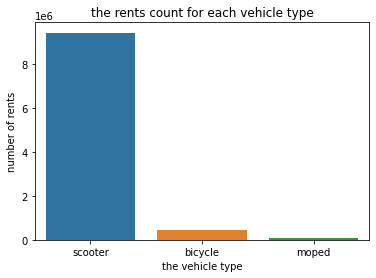

In [121]:
# plotting the number of rents for each vehicle type

# get the samples count
vehicle_frequency = data['Vehicle Type'].value_counts().values

# define the labels 
vehicle_classes = data['Vehicle Type'].value_counts().index

# creating the bar plot 
sns.barplot(vehicle_classes,
            vehicle_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("the vehicle type") 
plt.ylabel("number of rents") 
plt.title("the rents count for each vehicle type")
plt.show() 

<p class="alert alert-block alert-info">The Scooter has the highest number of rents and the Moped has the lowest number of rents<p/>

### - year


In [122]:
# get the number of rents for each year
data['Year'].value_counts()

2019    6036131
2018    2250627
2020    1699393
Name: Year, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


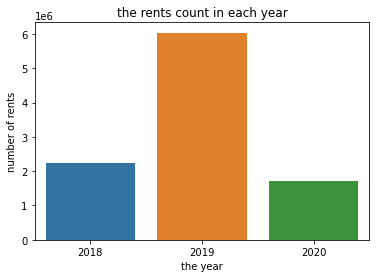

In [123]:
# plotting the number of rents in each year

# get the samples count
year_frequency = data['Year'].value_counts().values

# define the labels 
year_classes = data['Year'].value_counts().index

# creating the bar plot 
sns.barplot(year_classes,
            year_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("the year") 
plt.ylabel("number of rents") 
plt.title("the rents count in each year")
plt.show() 


<p class="alert alert-block alert-info">2019 has the highest number of rents and 2020 has the lowest number of rents<p/>

### - months

In [25]:
# get the unique values
np.sort(data['Month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [142]:
# find the total number of rents for each month
months_count = data[['Year','Month']]\
                .groupby(['Year','Month'])\
                .size()\
                .reset_index()\
                .rename(columns = {0 : "rents"})\
                
                

In [144]:
# create a matrix that has the indexes as months and columns as year
pivot_months_count = months_count.pivot_table(index='Month',
                                              columns='Year',
                                              values='rents',
                                              aggfunc='sum', 
                                              fill_value=0)

In [145]:
pivot_months_count

Year,2018,2019,2020
Month,,,
1,0,367386,245379
2,0,440800,288107
3,0,844604,182451
4,55217,581020,15523
5,8872,600844,30277
6,71409,493008,56053
7,128446,503366,59301
8,330802,496482,191197
9,393855,584490,206236


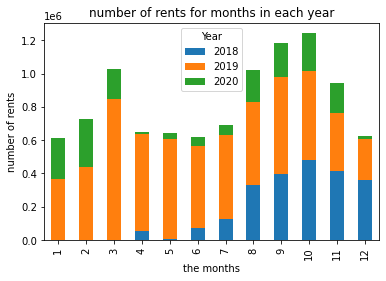

In [146]:
# bar plot to compare the number of rents in each month
pivot_months_count.plot.bar(stacked=True)

# set up the labels
plt.xlabel("the months") 
plt.ylabel("number of rents") 
plt.title("number of rents for months in each year") 
plt.show()


<p class="alert alert-block alert-info">In 2018, there weren't any rents in the first three months. After the first three months, May has the lowest number of rents, on the other hand, November has the highest number of rents. In 2019, March has the highest number of rents, on the other hand, December has the lowest number of rents. In 2020, February has the highest number of rents, on the other hand, December has the lowest number of rents<p/>


### - Part of the day

In [149]:
# get the unique values in the Part Of Day feature
data['Part Of Day'].unique()

['Eve', 'Noon', 'Night', 'Morning', 'Early Morning', 'Late Night']
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


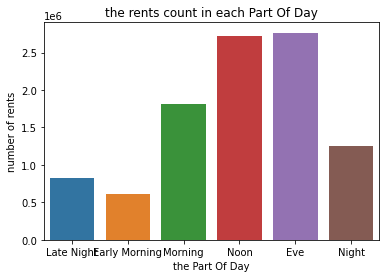

In [150]:
# plotting the total number of rents in each Part Of Day

# get the samples count
part_day_frequency = data['Part Of Day'].value_counts().values

# define the labels 
part_day_classes = data['Part Of Day'].value_counts().index

# creating the bar plot 
sns.barplot(part_day_classes,
            part_day_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("the Part Of Day") 
plt.ylabel("number of rents") 
plt.title("the rents count in each Part Of Day")
plt.show() 


<p class="alert alert-block alert-info">The highest number of rents were in the evening. On the other hand, the lowest number of rents were in the morning. <p/>

### - Day of Weeky

In [151]:
# get the unique values in the Day of Week feature
np.sort(data['Day of Week'].unique())

array([0, 1, 2, 3, 4, 5, 6])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


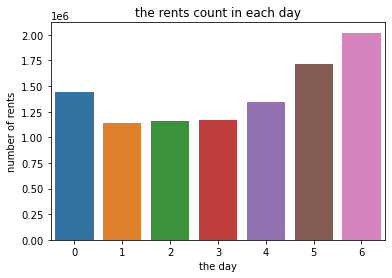

In [152]:
# plotting the total number of rents in each day of week

# get the samples count
day_frequency = data['Day of Week'].value_counts().values

# define the labels 
day_classes = data['Day of Week'].value_counts().index

# creating the bar plot 
sns.barplot(day_classes,
            day_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("the day") 
plt.ylabel("number of rents") 
plt.title("the rents count in each day")
plt.show() 


<p class="alert alert-block alert-info">Monday has the lowest number of rents, Saturday has the highest number of rents<p/>

### -  Council District (Start)

In [153]:
# get the unique values in the Council District (Start) feature
data['Council District (Start)'].unique()

array([9, 3, 5, 1, 0, 8, 7, 10, 4, 2, 6, '9', '2', '5', '3', '1', '0',
       '8', '10', '4', '7', '6'], dtype=object)

In [154]:
# there is a problem here that some values exist in string type and in int type.
# we will convert it into one datatype
data['Council District (Start)'] = data['Council District (Start)'].astype('int').astype('str')

In [155]:
# get the unique values in the Council District (Start) feature
data['Council District (Start)'].unique()

array(['9', '3', '5', '1', '0', '8', '7', '10', '4', '2', '6'],
      dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


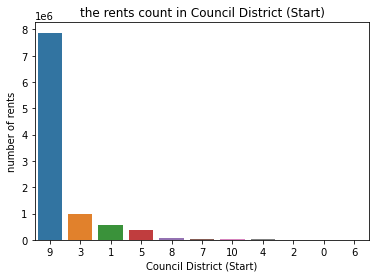

In [156]:
# plotting the total number of rents in each council district - start

# get the samples count
start_district_frequency = data['Council District (Start)'].value_counts().values

# define the labels 
start_district_classes = data['Council District (Start)'].value_counts().index

# creating the bar plot 
sns.barplot(start_district_classes,
            start_district_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("Council District (Start)") 
plt.ylabel("number of rents") 
plt.title("the rents count in Council District (Start)")
plt.show() 

<p class="alert alert-block alert-info">District 9 has the highest number of rents<p/>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


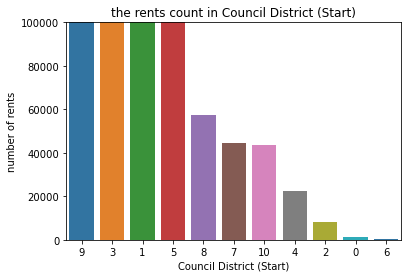

In [157]:
# creating the bar plot 
sns.barplot(start_district_classes,
            start_district_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("Council District (Start)") 
plt.ylabel("number of rents") 
plt.title("the rents count in Council District (Start)")
plt.ylim(0, 100000)
plt.show() 

<p class="alert alert-block alert-info">District 6 has the lowest number of rents<p/>

### -  Council District (End)

In [158]:
# get the unique values in the Council District (End) feature
data['Council District (End)'].unique()

array([9, 1, 3, 5, 0, 8, 7, 10, 4, 2, 6, '9', '2', '3', '5', '1', '0',
       '8', '10', '4', '7', '6'], dtype=object)

In [159]:
# there is a problem here that some values exist in string type and in int type. 
# we will convert it into one datatype
data['Council District (End)'] = data['Council District (End)'].astype('int').astype('str')

In [160]:
# get the unique values in the Council District (End) feature
data['Council District (End)'].unique()

array(['9', '1', '3', '5', '0', '8', '7', '10', '4', '2', '6'],
      dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


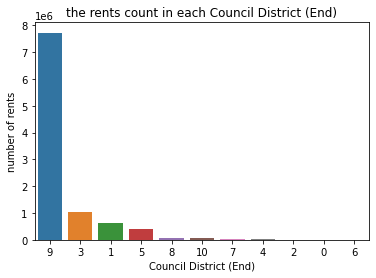

In [164]:
# plotting the total number of rents in each council district - end

# get the samples count
end_district_frequency = data['Council District (End)'].value_counts().values

# define the labels 
end_district_classes = data['Council District (End)'].value_counts().index

# creating the bar plot 
sns.barplot(end_district_classes,
            end_district_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("Council District (End)") 
plt.ylabel("number of rents") 
plt.title("the rents count in each Council District (End)")
plt.show() 

<p class="alert alert-block alert-info">District 9 has the highest number of rents<p/>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


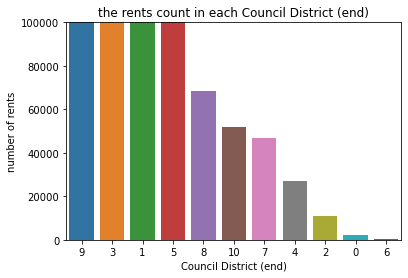

In [165]:
# creating the bar plot 
sns.barplot(end_district_classes,
            end_district_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("Council District (end)") 
plt.ylabel("number of rents") 
plt.title("the rents count in each Council District (end)")
plt.ylim(0, 100000)
plt.show() 

<p class="alert alert-block alert-info">District 6 has the lowest number of rents<p/>

### - County Start

In [163]:
# get the unique values in the County Start feature
data['County Start'].unique()

array(['453', '491', '209', '055', '021'], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


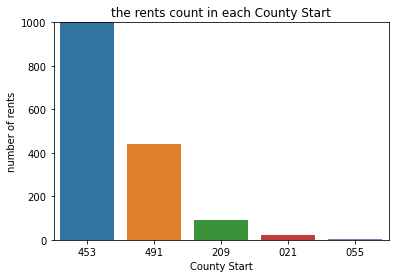

In [172]:
# plotting the total number of rents in each County Start

# get the samples count
start_county_frequency = data['County Start'].value_counts().values

# define the labels 
start_county_classes = data['County Start'].value_counts().index

# creating the bar plot 
sns.barplot(start_county_classes,
            start_county_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("County Start") 
plt.ylabel("number of rents") 
plt.title("the rents count in each County Start")
plt.ylim(0, 1000)
plt.show() 

<p class="alert alert-block alert-info">The highest number of rents were in the county of 453. On the other hand, the lowest number of rents were in the county of 055. <p/>

### - County End

In [173]:
# get the unique values in the County Start feature
data['County End'].unique()

array(['453', '491', '209', '055', '021'], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


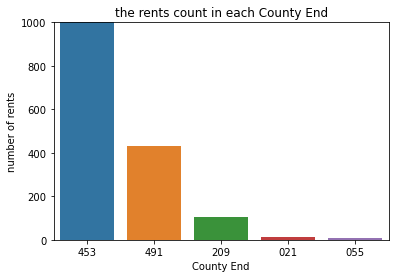

In [174]:
# plotting the total number of rents in each County Start

# get the samples count
end_county_frequency = data['County End'].value_counts().values

# define the labels 
end_county_classes = data['County End'].value_counts().index

# creating the bar plot 
sns.barplot(end_county_classes,
            end_county_frequency,
            palette = sns.color_palette())

# set up the labels
plt.xlabel("County End") 
plt.ylabel("number of rents") 
plt.title("the rents count in each County End")
plt.ylim(0, 1000)
plt.show() 

<p class="alert alert-block alert-info">The highest number of rents were in the county of 453. On the other hand, the lowest number of rents were in the county of 055. <p/>


<p class="alert alert-block alert-success"> <strong>numerical features</strong> : Trip Duration and Trip Distance

### - Trip Duration

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


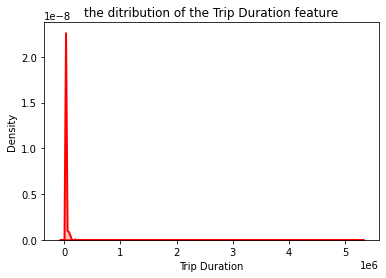

In [175]:
# check the distribution
sns.distplot(data['Trip Duration'],
             hist = False,
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2},  
             label = "Duration", color ="red")

# set up the labels
plt.xlabel("Trip Duration") 
plt.title("the ditribution of the Trip Duration feature")
plt.show() 

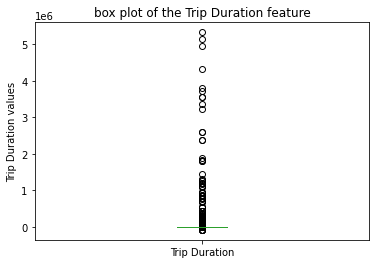

In [38]:
# box plot to check the outliers
data['Trip Duration'].plot.box()

# set up the labels
plt.ylabel("Trip Duration values") 
plt.title("box plot of the Trip Duration feature")
plt.show()

In [39]:
# find the min value
data['Trip Duration'].min()

-86161

In [40]:
# find the max value
data['Trip Duration'].max()

5330845

In [41]:
# find the median
data['Trip Duration'].median()

410.0

In [42]:
# find the IQR
data['Trip Duration'].quantile(0.75)-data['Trip Duration'].quantile(0.25)

528.0

### - Trip Distance

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


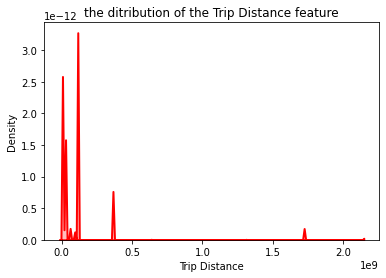

In [43]:
# check the distribution
sns.distplot(data['Trip Distance'],
             hist = False,
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2},  
             label = "Distance", color ="red")

# set up the labels
plt.xlabel("Trip Distance") 
plt.title("the ditribution of the Trip Distance feature")
plt.show() 

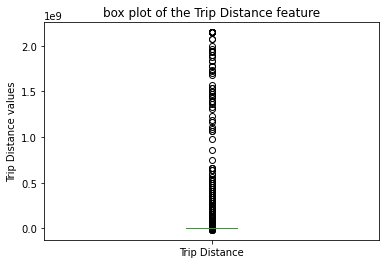

In [44]:
# box plot to check the outliers
data['Trip Distance'].plot.box()

# set up the labels
plt.ylabel("Trip Distance values") 
plt.title("box plot of the Trip Distance feature")
plt.show()

In [45]:
# find the min value
data['Trip Distance'].min()

-16724106.0

In [46]:
# find the max value
data['Trip Distance'].max()

2147483647.0

In [47]:
# find the median
data['Trip Distance'].median()

1038.0

In [48]:
# find the IQR
data['Trip Distance'].quantile(0.75)-data['Trip Distance'].quantile(0.25)

1482.0

<p class="alert alert-block alert-info">For the two previous features, we will solve the problems of skewness and outliers using adaptive binning. Also, we need to convert them into bins so we can extract the target variable and easily create groups.

# `feature engineering`

### - deal with the skewness and the outliers in the Trip Distance and Trip Duration features using adaptive binning

In [176]:
# define the labels they will be the feature classes
quantile_labels = ['windspeed-0-25Q', 'windspeed-25-50Q',
                   'windspeed-50-75Q', 'windspeed-75-100Q']

# the quantiles values
quantile_list = [0, 0.25, 0.5, 0.75, 1.0]

# discretize based on the quartiles
data['Trip Distance'] = pd.qcut(data['Trip Distance'],
                            q = quantile_list,       
                            labels = quantile_labels)

# discretize based on the quartiles
data['Trip Duration'] = pd.qcut(data['Trip Duration'],
                            q = quantile_list,       
                            labels = quantile_labels)

In [242]:
data.head()

,Vehicle Type,Trip Duration,Trip Distance,Month,Day of Week,Council District (Start),Council District (End),Year,County Start,County End,Part Of Day
0,scooter,windspeed-50-75Q,windspeed-25-50Q,4,2,9,9,2018,453,453,Eve
1,scooter,windspeed-25-50Q,windspeed-25-50Q,4,2,9,9,2018,453,453,Eve
2,scooter,windspeed-75-100Q,windspeed-75-100Q,4,1,9,9,2018,453,453,Noon
3,scooter,windspeed-50-75Q,windspeed-25-50Q,4,5,9,9,2018,453,453,Night
4,scooter,windspeed-25-50Q,windspeed-50-75Q,4,5,9,9,2018,453,453,Night


### - extract the target variable which is the number rents


<p class="alert alert-block alert-danger"> I did this step using the external Python env because this step take much time

In [243]:
# save the current data
data.to_csv("/Users/emadarmiti/Desktop/cap-s5/machine_learning/projects/Shared Micromobility Vehicle TripsTransportation And Mobility/data_v1.csv")

In [ ]:
# group by all features then count the number of samples
'''
labeled_data = data.groupby(list(data.columns))\
                    .size()\
                    .reset_index()\
                    .rename(columns={0 : 'count'})
'''
# delete the rows that have zero frequency
'''
labeled_data2 = labeled_data[labeled_data['count']!=0]
'''

In [342]:
# get the data after extracting the rents count
grouped_data = pd.read_csv("/Users/emadarmiti/Desktop/cap-s5/machine_learning/projects/Shared Micromobility Vehicle TripsTransportation And Mobility/data_v2.csv")

In [343]:
grouped_data.head()

,Unnamed: 0,Vehicle Type,Trip Duration,Trip Distance,Month,Day of Week,Council District (Start),Council District (End),Year,County Start,County End,Part Of Day,count
0,0,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2019,453,453,Late Night,1
1,1,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2019,453,453,Noon,3
2,2,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2020,453,453,Morning,2
3,3,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2020,453,453,Noon,3
4,4,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,3,3,2019,453,453,Late Night,2


In [344]:
# get the new shape
grouped_data.shape

(348684, 13)

In [345]:
# delete an unnecessary feature
grouped_data = grouped_data.drop(["Unnamed: 0"], axis=1)

### - log transformation for the target variable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


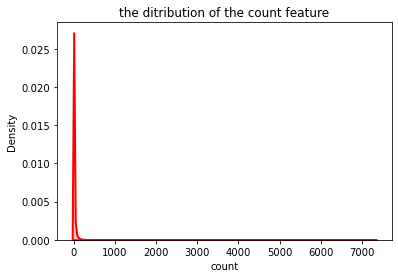

In [346]:
# check the distribution
sns.distplot(grouped_data['count'],
             hist = False,
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2},  
             label = "Distance", color ="red")

# set up the labels
plt.xlabel("count") 
plt.title("the ditribution of the count feature")
plt.show() 

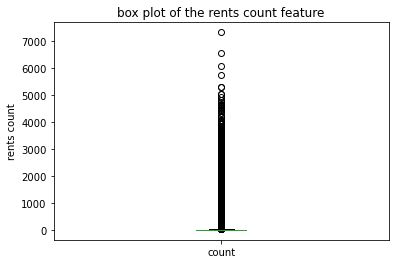

In [347]:
# box plot to check the outliers
grouped_data['count'].plot.box()

# set up the labels
plt.ylabel("rents count") 
plt.title("box plot of the rents count feature")
plt.show()

<p class="alert alert-block alert-info"> we will solve the problems of skewness and outliers using Log Transformation.

In [348]:
# log transformation for the count feature
grouped_data['count'] = np.log((1+ grouped_data['count']))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


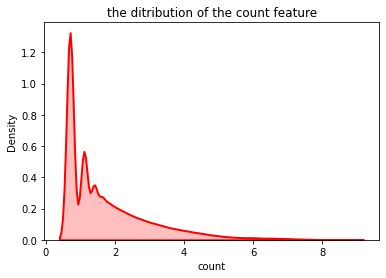

In [349]:
# check the distribution
sns.distplot(grouped_data['count'],
             hist = False,
             kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2},  
             label = "Distance", color ="red")

# set up the labels
plt.xlabel("count") 
plt.title("the ditribution of the count feature")
plt.show() 

In [350]:
grouped_data.head()

,Vehicle Type,Trip Duration,Trip Distance,Month,Day of Week,Council District (Start),Council District (End),Year,County Start,County End,Part Of Day,count
0,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2019,453,453,Late Night,0.693147
1,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2019,453,453,Noon,1.386294
2,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2020,453,453,Morning,1.098612
3,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,1,1,2020,453,453,Noon,1.386294
4,bicycle,windspeed-0-25Q,windspeed-0-25Q,1,0,3,3,2019,453,453,Late Night,1.098612


### - feature encoding

In [351]:
# get the names of the features
features = list(grouped_data.drop(['count'],1).columns)

# encode the features
features_encoded = pd.get_dummies(grouped_data[features].astype(str))

# add them to the data
data_encoded = pd.concat([grouped_data,features_encoded],axis=1)

# drop the original columns
data_encoded  = data_encoded.drop(features,axis=1)

In [352]:
features_encoded.head()

,Vehicle Type_bicycle,Vehicle Type_moped,Vehicle Type_scooter,Trip Duration_windspeed-0-25Q,Trip Duration_windspeed-25-50Q,Trip Duration_windspeed-50-75Q,Trip Duration_windspeed-75-100Q,Trip Distance_windspeed-0-25Q,Trip Distance_windspeed-25-50Q,Trip Distance_windspeed-50-75Q,...,County End_21,County End_453,County End_491,County End_55,Part Of Day_Early Morning,Part Of Day_Eve,Part Of Day_Late Night,Part Of Day_Morning,Part Of Day_Night,Part Of Day_Noon
0,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


# `gradient boost regression `

### - split the data into training and testing part

In [353]:
# split the data to training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded.drop([ 'count'],1),
    data_encoded['count'],
    test_size=0.3,
    random_state=13)

### - gradient boost without hyperparameters tuning 

In [354]:
# define the hyperparameters
params = {'n_estimators': 500, # number of trees in forest
          'max_depth': 4, # trees max depth
          'min_samples_split': 5, # minimum number of samples required to split a node
          'learning_rate': 0.01, # method of selecting samples for training each tree
         }

# define the gradint boost object using the above params
gradient_boost = ensemble.GradientBoostingRegressor(**params)

In [355]:
# fit the model
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [321]:
# r^2 score
gradient_boost.score(X_test, y_test)

0.5091472554680248

<p class="alert alert-block alert-info"> the accuracy is 50% which is bad, we will do hyerparameters tuning to get better results

### - gradient boost and hyperparameters tuning

In [373]:
# define the base model
base_model = ensemble.GradientBoostingRegressor(random_state = 42)

# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5, len(features_encoded.columns), num = 10)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [5, 10, 16]

# minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]

# method of selecting samples for training each tree
learning_rate = [0.01, 0.1]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [374]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 4 fold cross validation
# number of folds = data_size / (data_size * 0.30) 
# search across 10 different combinations( 40 total ), and use all available cores
gradient_boost_random = RandomizedSearchCV(estimator = base_model, # the base model
                               param_distributions = random_grid, # grid of hyper parameters
                               n_iter = 10, # number of combinations of random hyper parameters to choose
                               cv = 4, # 4-fold
                               verbose = 2,  # print some logs while evaluating the different combinations
                               n_jobs = -1) # use all cores in the machine to train (parallel)


In [375]:
# fit the model
gradient_boost_random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed: 114.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 114.1min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 19, 27, 34, 41, 49,
                                                      56, 63, 71, None],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [376]:
# get the best model
best_gbt_model = gradient_boost_random.best_estimator_

In [377]:
# r^2 score
best_gbt_model.score(X_test, y_test)

0.9038201729282793

In [378]:
# get best huperparameters
gbt_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 51,
 'learning_rate': 0.01}

<p class="alert alert-block alert-info"> the accuracy now is 90% which is good. the best parameters are {'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 51,
 'learning_rate': 0.01}

### - feature importances

In [396]:
# define the feature importance dataframe
feature_importances_df = pd.DataFrame(columns=['feature', 'feature_importance'])

In [397]:
feature_importances_df

,feature,feature_importance


In [398]:
# get the feature imporances from the model
feature_importances = best_gbt_model.feature_importances_

In [399]:
# sum of the feature importances for the same feature 

# go over the features
for feature in grouped_data.drop(['count'], 1).columns:
    
    # sum of the feature importances for the same feautre by slicing the numbers 
    # by the feature unique values length
    feature_importance = sum(feature_importances[:len(grouped_data[feature].unique())])

    # add them to the feature importances dataframe
    feature_importances_df = feature_importances_df.append(pd.Series([feature, feature_importance],
                                                            index=['feature',
                                                                   'feature_importance']),
                                                            ignore_index=True)
    
    # delete the numbers for the feature we finished
    feature_importances = feature_importances[len(grouped_data[feature].unique()):]

In [400]:
# sort the features based on their features importance
feature_importances_df = feature_importances_df.sort_values(by = 'feature_importance', ascending = False)

In [403]:
feature_importances_df

,feature_importance
feature,
Council District (End),0.204850
Vehicle Type,0.127553
Council District (Start),0.124896
Trip Duration,0.124117
Trip Distance,0.101979
Month,0.099419
Part Of Day,0.099142
Year,0.071691
Day of Week,0.046341


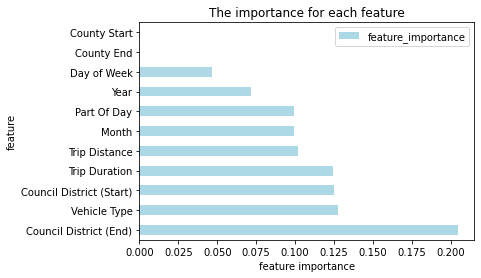

In [420]:
# bar plot for the features importance
ax = feature_importances_df\
    .set_index('feature')\
    .plot.barh(title='The importance for each feature',
               color='lightblue')

# set the labels
ax.set_xlabel("feature importance")
ax.set_ylabel("feature")
plt.show()

<p class="alert alert-block alert-info"> It seems that Council District (End) feature is the top feature contributing to the predictions of the model. On the other hand, the County features have the lowest contributing to the predictions.